In [65]:
import pandas as pd

In [66]:
wiki_url = "https://en.wikipedia.org/wiki/List_of_mass_shootings_in_the_United_States"

In [67]:
#load the data from wikipedia
wiki_dfs = pd.read_html(wiki_url)

In [68]:
# remove the last item (wikipedia related items)
dont_care = wiki_dfs.pop()

In [69]:
#remove wiki's summary cells 
del wiki_dfs[13]
del wiki_dfs[13] #cell 14 becomes 13 after the last command, so it looks dumb

In [70]:
#fix the one table where they didn't label description
wiki_dfs[11]["Description"] = wiki_dfs[11]["Unnamed: 5"]
wiki_dfs[11].drop(columns=['Unnamed: 5'], inplace=True)

In [71]:
#join (union) all of  the dfs ( tables from the wikipedia table ) to one df
#list comprehension used in the concat function rather than listing all dfs manually
all_shootings_df  = pd.concat([  df for df in wiki_dfs ])

In [72]:
#set index to date
#all_shootings_df = all_shootings_df.set_index("Date")

In [73]:
#split out the dead notes
all_shootings_df[['Dead New','Dead Notes 1','Dead Notes 2']] = all_shootings_df.Dead.str.split("[",expand=True)
all_shootings_df['Dead Notes 1'] = all_shootings_df['Dead Notes 1'].str.replace("]", "")
all_shootings_df['Dead Notes 2'] = all_shootings_df['Dead Notes 2'].str.replace("]", "")

In [74]:
#fix the dates - hacky
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('May 21–25, 1969', 'May 21, 1969–May 25, 1969')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('July 23–24, 1968', 'July 23, 1968–July 24, 1969')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('July 27–29, 1999', 'July 27, 1999–July 29, 1999')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('January 19–20, 2010', 'January 19, 2010–January 20, 2010')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('February 3–12, 2013', 'February 3, 2013–February 12, 2013')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('May 31 – June 1, 1921', 'May 31, 1921–June 1, 1921')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('May 5 –May 6, 2016', 'May 5, 2016–May 6, 2016')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('April 21 –April 22, 2016', 'April 21, 2016–April 22, 2016')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('May 30–June 4, 2018', 'May 30, 2018–June 4, 2018')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('March 7 – 8, 2016', 'March 7, 2016–March 8, 2016')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('April 13 –April 18, 2017', 'April 13, 2017–April 18, 2017')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('June 17–18, 1990', 'June 17, 1990–June 18, 1990')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('February 16 – October 23, 2002', 'February 16, 2002–October 23, 2002')

In [75]:
#find start and end dates
all_shootings_df[['Date Start','Date End']]=all_shootings_df.Date.str.split("–",expand=True)

In [76]:
# replace dead new with dead and split dead min and max
all_shootings_df['Dead'] = all_shootings_df['Dead New']

In [77]:
#drop dead new
all_shootings_df.drop(columns=['Dead New'], inplace=True)

In [78]:
#split dead min and max
all_shootings_df[['Dead Min','Dead Max']] = all_shootings_df.Dead.str.split("-",expand=True)

In [79]:
#Drop Dead 
all_shootings_df.drop(columns=['Dead'], inplace=True)

In [80]:
#split out the Injured notes
all_shootings_df[['Injured New','Injured Notes 1','Injured Notes 2']] = all_shootings_df.Injured.str.split("[",expand=True)
all_shootings_df['Injured Notes 1'] = all_shootings_df['Injured Notes 1'].str.replace("]", "")
all_shootings_df['Injured Notes 2'] = all_shootings_df['Injured Notes 2'].str.replace("]", "")
# replace dead new with dead and split dead min and max
all_shootings_df['Injured'] = all_shootings_df['Injured New']
all_shootings_df.drop(columns=['Injured New'], inplace=True)
#split Injured min and max
all_shootings_df[['Injured Min','Injured Max']] = all_shootings_df.Injured.str.split("-",expand=True)
#injured has some unknowns and a + on some columns
all_shootings_df['Injured Min'] = all_shootings_df['Injured Min'].str.replace("+", "")
all_shootings_df['Injured Min'] = all_shootings_df['Injured Min'].str.replace("unknown", "0")

#Drop Injured 
all_shootings_df.drop(columns=['Injured'], inplace=True)

In [81]:
#average the dead as float
all_shootings_df['Dead Average'] = all_shootings_df[['Dead Min','Dead Max']].astype(float).mean(axis=1)

In [82]:
#average the injured as float
all_shootings_df['Injured Average'] = all_shootings_df[['Injured Min','Injured Max']].astype(float).mean(axis=1)

<AxesSubplot:>

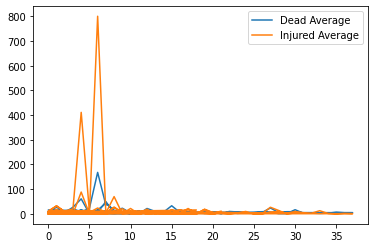

In [83]:
all_shootings_df.plot()

In [84]:
all_shootings_df.sort_index(inplace=True)
all_shootings_df

,Date,Location,Total,Description,Dead Notes 1,Dead Notes 2,Date Start,Date End,Dead Min,Dead Max,Injured Notes 1,Injured Notes 2,Injured Min,Injured Max,Dead Average,Injured Average
0,"April 15, 2021","Indianapolis, Indiana",16,Indianapolis FedEx shooting: early reports sta...,n 1,None,"April 15, 2021",None,9,None,None,None,7,None,9.0,7.0
0,"November 3, 1979","Greensboro, North Carolina",17,Greensboro Massacre (1979): Members of the Com...,None,None,"November 3, 1979",None,5,None,NaN,NaN,NaN,NaN,5.0,NaN
0,"September 14, 1989","Louisville, Kentucky",21,Standard Gravure shooting (1989): A 47-year-ol...,n 1,None,"September 14, 1989",None,9,None,None,None,12,None,9.0,12.0
0,"September 28, 2016","Townville, South Carolina",5,Townville Elementary School shooting: A fourte...,None,None,"September 28, 2016",None,2,None,NaN,NaN,NaN,NaN,2.0,NaN
0,"May 21, 1969–May 25, 1969","Greensboro, North Carolina",29,"1969 Greensboro uprising: Student protestors, ...",None,None,"May 21, 1969","May 25, 1969",2,None,NaN,NaN,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,"March 5, 2001","Santee, California",15,Santana High School shooting: A 15-year-old st...,None,None,"March 5, 2001",None,2,None,None,None,13,None,2.0,13.0
34,"January 10, 2001","Nevada County, California",5,2001 Nevada County shootings: The perpetrator ...,None,None,"January 10, 2001",None,3,None,None,None,2,None,3.0,2.0
35,"December 26, 2000","Wakefield, Massachusetts",7,"Wakefield massacre: Michael McDermott, an appl...",None,None,"December 26, 2000",None,7,None,None,None,0,None,7.0,0.0
36,"May 24, 2000","New York City, New York",7,Wendy's massacre: Two robbers locked seven emp...,None,None,"May 24, 2000",None,5,None,None,None,2,None,5.0,2.0


In [85]:
#all_shootings_df=all_shootings_df.reset_index()

In [86]:
#notes:
# - n1 in dead includes shooter, put in another column
# -nX in dead includes non-shooting related ( stabbing )- on the fence
# Dates - dates spanning multiple days will be limited to the start date
# location will get split to city / state as new columns
# where there is a range specified, the lowest of that range will be used 
# total is kind of not needed since I'm doing the averages. felt cure, thought I'd keep for now

In [87]:
all_shootings_df['Date'].unique

<bound method Series.unique of 0                April 15, 2021
0              November 3, 1979
0            September 14, 1989
0            September 28, 2016
0     May 21, 1969–May 25, 1969
                ...            
33                March 5, 2001
34             January 10, 2001
35            December 26, 2000
36                 May 24, 2000
37               April 28, 2000
Name: Date, Length: 267, dtype: object>